In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

Uwaga - na samym dole dzieło mojego życia (a bardziej tego tygodnia), więc przeklikać się do końca proszę

# LOSOWE INFO O JAWORZU

In [2]:
N = 7026 ##liczba osób w Jaworzu
# kod: 24;02;06;2
t = 10000

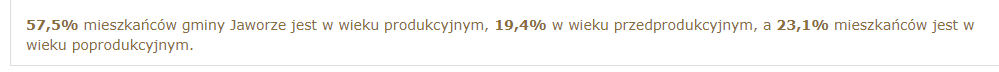

wiek produkcyjny: wiek zdolności do pracy, tj. dla mężczyzn grupa wieku 18-64 lata, dla kobiet - 18-59 lat <br>
czyli takie 18-60

# WCZYTANIE PLIKÓW CSV

In [3]:
##nazwiska męskie i kobiece
nm = pd.read_csv("NM.csv")
nm = nm[nm["Liczba"] > t] ## imiona za tym t=1000 są z dupy - takie pojedyncze crazy ahmiry szmiry
nk = pd.read_csv("NK.csv")
nk = nk[nk["Liczba"] > t]
nk = nk["Nazwisko aktualne"]
nm = nm["Nazwisko aktualne"]

In [4]:
##imiona męskie i kobiece
im = pd.read_csv("IM.csv")
im = im[im["LICZBA WYSTĄPIEŃ"] > t] 
ik = pd.read_csv("IK.csv")
ik = ik[ik["LICZBA_WYSTĄPIEŃ"] > t]
ik = ik["IMIĘ_PIERWSZE"]
im = im["IMIĘ PIERWSZE"]

In [5]:
##ulice z jaworza
ulice = pd.read_csv("ULIC.csv", sep=";")
ulice_jaworze = ulice.query('WOJ == 24 & POW == 2 & GMI == 6 & RODZ_GMI == 2')
ulice_jaworze = np.array(ulice_jaworze["NAZWA_1"])

# LUDNOŚĆ

In [6]:
def ludzie(mi, ki, mn, kn, ul, pk= 0.516, N=7349 ):
    imie = []
    nazwisko = []
    wiek = []
    adres = []
    tel = []
    
    for n in range(N):
        
        p = random.random()
        
        if p < pk: ##losujemy kobietę
            imie.append(random.choice(ki))
            nazwisko.append(random.choice(kn))
        
        else: #losujemy mężczyznę
            imie.append(random.choice(mi))
            nazwisko.append(random.choice(mn))
        
        p = random.random()
        
        if p < 0.575: ##dane statystyczne - 57.5% osób jest w wieku produkcyjnym
            wiek.append(random.randint(18,60))
        elif p < 0.77:
            wiek.append(random.randint(8, 18)) ##19.4% w przedprodukcyjnym
        else:
            wiek.append(random.randint(60,99)) ##reszta starsza
            
            
        p = random.random()   
        if p< 0.90:
            adres.append(random.choice(ul) + ' ' + str(random.randint(1,100)))
            
            p = random.random()
            if p< 0.90:
                tel.append(random.randint(500000000, 999999999))
            else:
                tel.append("NULL")
                
        else:
            adres.append("NULL")
            tel.append(random.randint(500000000, 999999999))
        
        
            
    
    return pd.DataFrame({"ID": range(1,N+1), "IMIĘ": imie, "NAZWISKO": nazwisko, "WIEK": wiek, "ADRES": adres, "TELEFON": tel})

In [7]:
ludzie(im, ik, nm, nk, ulice_jaworze) ## numer telefonu

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,1,DIANA,KRAWCZYK,52,Spadzista 81,898394535
1,2,BOŻENNA,URBAŃSKA,60,Morelowa 30,620982569
2,3,KACPER,CIEŚLAK,10,NULL,720724805
3,4,GRAŻYNA,KALINOWSKA,36,Kaczeńcowa 89,600818572
4,5,ALEKSANDER,KOZIOŁ,28,Willowa 1,708148828
...,...,...,...,...,...,...
7344,7345,MAREK,PAWLIK,34,Miętowa 80,957005718
7345,7346,NADIA,WIŚNIEWSKA,75,Wiśniowa 26,710690583
7346,7347,SYLWESTER,POLAK,51,NULL,751287259
7347,7348,EUGENIUSZ,KOWALEWSKI,43,Złocista 85,854542884


# WIEK A PRAWDOPODOBIEŃSTWO PRZYJŚCIA

In [8]:
def transform_wiek(wiek): 
    ## funkcja zwracająca częstość z jaką dana  osoba na podst wieku mogłaby nas odwiedzać (czyli jakby pp ze nas odwiedzi)
    
    if wiek < 10:
        return 1
    elif wiek < 12:
        return 2
    elif wiek < 16:
        return 3
    elif wiek < 20:
        return 5
    elif wiek < 30:
        return 6
    elif wiek < 38:
        return 5
    elif wiek < 45:
        return 4
    elif wiek < 55:
        return 3
    elif wiek < 70:
        return 2
    else:
        return 1


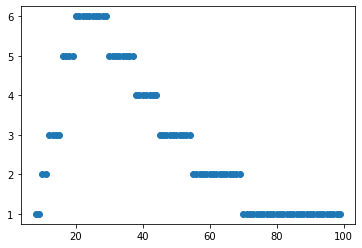

In [9]:
x = np.arange(8,100, 1)
y = [transform_wiek(xx) for xx in x]
plt.scatter(x,y)

In [10]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze, 0.516, N=75) ##wrzucam to do df bo tak
aa["PP"] = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]
aa

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP
0,1,MYKOLA,ZAJĄC,18,Miętowa 88,NULL,5
1,2,WŁADYSŁAWA,LASKOWSKA,50,Storczyków 15,765408195,3
2,3,EWELINA,KOZAK,56,Widok 78,561861960,2
3,4,EMIL,MICHALAK,49,Brzoskwiniowa 77,838606175,3
4,5,HALYNA,TOMCZYK,38,Chabrowa 52,585415994,4
...,...,...,...,...,...,...,...
70,71,DAGMARA,KRÓL,10,NULL,674725036,2
71,72,LUDWIK,PAWLAK,26,Żurawinowa 9,974083505,6
72,73,MARTYNA,ZAJĄC,8,Cieszyńska 26,661117157,1
73,74,BOŻENNA,CZERWIŃSKA,50,Łukowa 68,NULL,3


In [11]:
new = [aa["ID"][x] for x in range(len(aa)) for i in range(int(aa["PP"][x])) ]

## wektor do random choice  - do pojawiania się klientów (ich id)
## tworze wektor w zależności od wartości PP (czyli np 1 wystąpi 3 razy bo takie miała PP i wyjdzie np [1,1,1,2,3,3,3,3,3...])
## no i w ten sposób to że wylosuje się 1 jest bardziej prawdopod. niż że wylosuje się 2, a mniej niż że 3

random.choice(new)

46

-- to co robię tutaj właściwie może się nie przydać, bo to just sprawdzenie czy działa i symulacja odwiedzin -- 

In [12]:
data = [random.choice(new) for _ in range(1000)] ##robię sobie 1000 powtórzeń, czyli 1000 odwiedzin naszego sklepu

In [13]:
count = [data.count(x) for x in range(1,76)] ## zliczam ile razy dane id nas odwiedziło

In [14]:
pd.DataFrame({"ID":range(1,76), "COUNT": count, "WIEK": aa["WIEK"]})
#no i dataframe zeby było widać

,ID,COUNT,WIEK
0,1,9,52
1,2,21,29
2,3,7,50
3,4,8,13
4,5,10,39
...,...,...,...
70,71,11,45
71,72,9,10
72,73,16,46
73,74,14,40


In [25]:
## i dla naszych jaworzańskich danych - troche dłużej się symuluje bo ustawiłam 10000 odwiedzin ogólnie
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
aa["PP"] = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]

new = [aa["ID"][x] for x in range(len(aa)) for i in range(int(aa["PP"][x])) ]
data = [random.choice(new) for _ in range(10000)]
count = [data.count(x+1) for x in range(len(aa))]
aa["ODWIEDZINY"] = count
aa
##i można sobie popatrzeć że mniej więcej działa, mamy jakieś odwiedziny i teraz możemy wykluczyć tych, których u nas nie było

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP,ODWIEDZINY
0,1,SZCZEPAN,ZAKRZEWSKI,38,Agrestowa 61,983230244,4,1
1,2,IWONA,DOMAŃSKA,71,Promienista 46,567331867,1,0
2,3,MARTYNA,KRÓL,54,Jałowcowa 79,690923199,2,0
3,4,TETIANA,JAROSZ,54,Stroma 100,612892821,2,1
4,5,IRENEUSZ,SIKORSKI,85,Kaczeńcowa 95,978047196,1,0
...,...,...,...,...,...,...,...,...
7344,7345,KATARZYNA,KONIECZNA,44,Miętowa 94,617791857,4,4
7345,7346,NADIA,PAWŁOWSKA,8,Brzoskwiniowa 21,968990396,1,0
7346,7347,RÓŻA,KOWALCZYK,21,Różana 89,753346942,8,1
7347,7348,VOLODYMYR,MUSIAŁ,49,Wiejska 93,882989836,4,0


In [26]:
aa[aa["ODWIEDZINY"] > 0] ##tylko ci co nas odwiedzili chociaż raz

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP,ODWIEDZINY
0,1,SZCZEPAN,ZAKRZEWSKI,38,Agrestowa 61,983230244,4,1
3,4,TETIANA,JAROSZ,54,Stroma 100,612892821,2,1
5,6,OSKAR,KUBIAK,14,Azaliowa 70,844138506,4,3
6,7,EDYTA,KRÓL,18,Dzwonkowa 30,NULL,8,1
7,8,MAGDA,SOBCZAK,46,Kolonia Dolna 98,608415460,4,1
...,...,...,...,...,...,...,...,...
7341,7342,AGATA,STANKIEWICZ,17,Zimowa 64,NULL,8,5
7343,7344,DAGMARA,PAWŁOWSKA,88,Liliowa 9,926148817,1,1
7344,7345,KATARZYNA,KONIECZNA,44,Miętowa 94,617791857,4,4
7346,7347,RÓŻA,KOWALCZYK,21,Różana 89,753346942,8,1


----------
# ODWIEDZINY - ALGORYTMY
---

Ustalamy, że:<br>
godziny otwarcia: 9-17 <br>
zakładamy, że przyjścia klientów są realizacjami procesu Poissona z jakąś $\lambda = $ losowa wartość
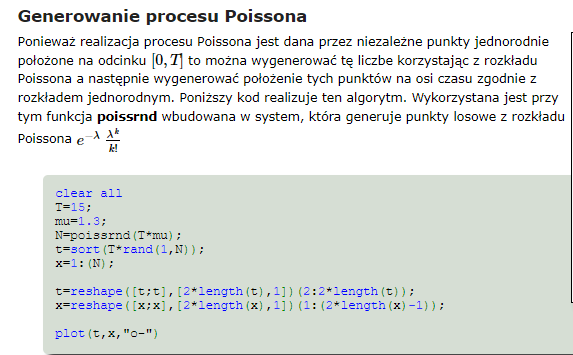


In [12]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
aa

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,1,VASYL,CHMIELEWSKI,84,Jaskółcza 32,891485788
1,2,ANDRII,SOBCZAK,86,Sosnowa 69,787457656
2,3,PRZEMYSŁAW,WAWRZYNIAK,40,Grabowa 94,822235562
3,4,SVITLANA,CZERWIŃSKA,36,Spacerowa 20,968895046
4,5,YULIIA,MRÓZ,11,Szkolna 45,651162507
...,...,...,...,...,...,...
7344,7345,RENATA,ANDRZEJEWSKA,77,Wczasowa 89,979612474
7345,7346,LILIANA,CZARNECKA,46,Spokojna 59,944562316
7346,7347,BRONISŁAWA,KOWALSKA,94,Krótka 12,757989835
7347,7348,ANTONINA,LESZCZYŃSKA,41,Rumiankowa 76,522176843


In [13]:
pp = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]

In [14]:
random.choices(aa["ID"], weights=pp , k=5) ##mamy losowanie człowieków którzy nas odwiedzają


[872, 4652, 4418, 3975, 1060]

In [15]:
T = 8 #[h]
lamb = 10
N = np.random.poisson(T*lamb)
ts = sorted(T*np.random.uniform(0,1, N))

In [16]:
import datetime
  
# Initializing a date and time
start = datetime.datetime(2023, 1, 1, 9, 0, 0)
t_wizyty = [(start + datetime.timedelta(minutes=round(t*60))).strftime("%m/%d/%Y %H:%M:%S") for t in ts]
klient = random.choices(aa["ID"], weights=pp , k=N)
pd.DataFrame({"id_mieszkańca":klient, "wizyta":t_wizyty})

,id_mieszkańca,wizyta
0,5424,01/01/2023 09:02:00
1,5567,01/01/2023 09:12:00
2,3888,01/01/2023 09:16:00
3,2714,01/01/2023 09:17:00
4,1087,01/01/2023 09:19:00
...,...,...
63,3560,01/01/2023 16:31:00
64,4959,01/01/2023 16:31:00
65,927,01/01/2023 16:39:00
66,738,01/01/2023 16:50:00


### FUNKCJA DO INVENTORY

In [17]:
def inven(n = 100): ##funkcja tworząca proste inventory (rental/shop)
    ilosc = np.random.randint(20, 30, n) ## od 20 do 30 każdego z tytułów
    ids = range(1, (n+1))
    ilosci = [ids[x] for x in range(len(ids)) for i in range(ilosc[x])]
    return pd.DataFrame({"id_inv": range(1, (len(ilosci)+1)),"id_tytuł": ilosci })

In [18]:
inv_rent = inven()
inv_shop = inven()

In [169]:
inv_rent

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2433,2434,100
2434,2435,100
2435,2436,100
2436,2437,100


In [412]:
inv_rent.value_counts("id_tytuł", sort=False) ## count ile mamy danych tytułów

id_tytuł
1     29
2     38
3     22
4     37
5     22
      ..
92    29
93    34
94    21
95    35
96    36
Length: 96, dtype: int64

#### dni świąteczne:
1 stycznia, 6 stycznia, 
9 kwietnia,
10 kwietnia, 
1 maja,
3 maja, 
8 czerwca

In [19]:
start = datetime.datetime(2023, 1, 2, 9, 0, 0)
swieta = [datetime.datetime(2023, 1, 6, 9, 0, 0), datetime.datetime(2023, 4, 9, 9, 0, 0), 
              datetime.datetime(2023, 4, 10, 9, 0, 0), datetime.datetime(2023, 3, 1, 9, 0, 0), 
              datetime.datetime(2023, 3, 3, 9, 0, 0), datetime.datetime(2023, 6, 8, 9, 0, 0)]
for d in range(1, 10):    
    dzis = start + datetime.timedelta(days=(d))
    if dzis in swieta:
        print(dzis)
    #print(dzis)

2023-01-06 09:00:00


### funkcja symulująca odwiedziny

ODWIEDZINY2 to funkcja uproszczona, raczej patrzeć na ODWIEDZINY()

In [74]:
def odwiedziny2(start = datetime.datetime(2023, 1, 2, 9, 0, 0), lamb = 8, mieszkancy = aa):
    ##start - pierwszy dzień otwarcia czyli 2.01.23 
    ##lamb - lambda potrzebna do symulowania ilości klientów na dzień
    ## mieszkańcy - no mieszkańcy którzy mogą nas nawiedzić
    
    T = 239/30 #7h 58 min bo tyle nasz sklep jest otwarty
    now = datetime.datetime.now()
    days = (now - start).days ##żeby te daty były do dzisiaj
    df = pd.DataFrame({})
    inv = inven()
    swieta = [datetime.datetime(2023, 1, 6, 9, 0, 0), datetime.datetime(2023, 4, 9, 9, 0, 0), 
              datetime.datetime(2023, 4, 10, 9, 0, 0), datetime.datetime(2023, 3, 1, 9, 0, 0), 
              datetime.datetime(2023, 3, 3, 9, 0, 0), datetime.datetime(2023, 6, 8, 9, 0, 0)]
    dd = [(s - start).days + 1 for s in swieta]
    
    for d in range(1, days):
        
        if d%6 == 0 or d%7 == 0 or (d in dd): ## wyłączenie weekendów i świąt
            pass 
        
        else:
            ##odwiedziny zgodne z procesem poissona
            N = np.random.poisson(T*lamb) ##ilość osób na cały dzień
            ts = sorted(T*np.random.uniform(0,1, N)) ##czasy wizyt (takie surowe)
            t_wizyty = [(start + datetime.timedelta(minutes=round(t*60,2))).strftime("%m/%d/%Y %H:%M:%S") for t in ts]
            ##formatka wizyt
            
            ##if czasy pomiedzy wizytami są małe to coś tam
            
                ##losowanie klientów z populacji mieszkańców
            klient = random.choices(mieszkancy["ID"], weights=pp , k=N)
            
                #losowanie sprzedawcy (zakładamy, że sprzedawca 1 i 2 obsługują kasy przez te 8 h)
            sprzedawca = random.choices([1,2], k=N)
            
                ##ktoś może chce kupić kilka gier zamiast jednej
            ilosc = random.choices(np.ceil(np.random.exponential(1,100)), k = N)
            
            ids = inv["id_inv"]
            gra = []
            gry = random.sample(sorted(ids), k = int(sum(ilosc)))   ## sample losuje bez zwracania
            
            for i in range(N):
                g = [gry.pop() for _ in range(int(ilosc[i]))] 
                ##ten pop sprawia że idę po id od tyłu, ale w ten sposób nie ma problemu z indeksami a to na jedno wychodzi
                gra.append(str(g)[1:-1])
            
            ##to jakbyśmy chcieli w inv uwzględniać
            
            ##dołączenie danego dnia do df z poprzednich dni
            day = pd.DataFrame({"id_mieszkańca": klient, "wizyta":t_wizyty,
                                "sprzedawca":sprzedawca, "ilosc":ilosc, "id_gry": gra})
            df = pd.concat([df, day])
                
        ##przejście z datą na kolejny dzień
        start = start + datetime.timedelta(days=1)
        
        ##pytanie czy chcemy mieć też rekordy z dziś dziś
        
    return df

In [118]:
inv_rent = inven()
tt = odwiedziny2()
tt

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry
0,58,01/02/2023 09:09:15,1,1.0,1556
1,44,01/02/2023 09:13:43,1,1.0,430
2,26,01/02/2023 09:15:37,1,1.0,2390
3,28,01/02/2023 09:21:47,2,1.0,1157
4,68,01/02/2023 09:31:24,2,2.0,"1927, 115"
...,...,...,...,...,...
50,10,06/16/2023 15:45:54,2,2.0,"977, 1662"
51,2,06/16/2023 16:29:22,2,1.0,527
52,70,06/16/2023 16:30:26,1,1.0,765
53,20,06/16/2023 16:34:15,1,1.0,1436


In [86]:
tt.iloc[220]

id_mieszkańca                   6475
wizyta           01/05/2023 12:18:18
sprzedawca                         1
ilosc                            2.0
id_gry                          2968
Name: 30, dtype: object

In [88]:
tt.iloc[250]

id_mieszkańca                   2296
wizyta           01/05/2023 16:48:50
sprzedawca                         2
ilosc                            1.0
id_gry                          3049
Name: 60, dtype: object

In [22]:
np.array([])

array([], dtype=float64)

-----
## CHYBA NAJWAŻNIEJSZA FUNKCJA JAK NA RAZIE
---

In [207]:
def odwiedziny(start = datetime.datetime(2022, 6, 6, 9, 0, 0), lamb = 4, mieszkancy = aa):
    
    T = 239/30 #7h 58 min bo tyle nasz sklep jest otwarty (z małym buforem, żeby nikt nie kupił czegoś po 1 s od otwarcia)
    now = datetime.datetime.now()
    days = (now - start).days ##żeby te daty były do dzisiaj
    df = pd.DataFrame({})
    inv_ren = inven() ##inventory startowe rental
    inv_shop = inven() ##inentory startowe sklep
    pp = [transform_wiek(mieszkancy["WIEK"][x]) for x in range(len(mieszkancy))] ##wagi dla mieszkancow - pp przyjscia
    
    rental =  pd.DataFrame({"id_inv": [], "return": [], "zniszczona": []}) ##df pomocnicza dla inv rentalowego
    kupno =  pd.DataFrame({"id_inv": [], "kupno": []}) ##dla kupna
    outlet =pd.DataFrame({"id_inv": [], "id_gry": [], "return": []}) ##wektor z inventory id z 
    
    swieta = [datetime.datetime(2023, 1, 6, 9, 0, 0), datetime.datetime(2023, 4, 9, 9, 0, 0), 
              datetime.datetime(2023, 4, 10, 9, 0, 0), datetime.datetime(2023, 3, 1, 9, 0, 0), 
              datetime.datetime(2023, 3, 3, 9, 0, 0), datetime.datetime(2023, 6, 8, 9, 0, 0), 
              datetime.datetime(2022, 6, 16, 9, 0, 0), datetime.datetime(2022, 8, 15, 9, 0, 0),
              datetime.datetime(2022, 11, 1, 9, 0, 0), datetime.datetime(2022, 11, 11, 9, 0, 0),
              datetime.datetime(2022, 12, 25, 9, 0, 0), datetime.datetime(2022, 12, 26, 9, 0, 0),]
    dd = [(s - start).days + 1 for s in swieta] ##dni jakie minęły od startu do święta (żeby móc je ominąć łatwo)
    
    for d in range(1, days + 1):
        
        if d%6 == 0 or d%7 == 0 or (d in dd): ## wyłączenie weekendów
            pass
        
        else:
            ##odwiedziny zgodne z procesem poissona
            N = np.random.poisson(T*lamb) ##ilość osób na cały dzień
            ts = sorted(T*np.random.uniform(0,1, N)) ##czasy wizyt (takie surowe)
            t_wizyty = [(start + datetime.timedelta(minutes=1) + datetime.timedelta(
                minutes=round(t*60,2))).strftime("%m/%d/%Y %H:%M:%S") for t in ts]
            ##formatka wizyt
            
            for t in t_wizyty:
                ##losowanie klientów z populacji mieszkańców
                klient = random.choices(mieszkancy["ID"], weights=pp , k=1)
            
                #losowanie sprzedawcy (zakładamy, że sprzedawca 1 i 2 obsługują kasy przez te 8 h)
                sprzedawca = random.choices([1,2], k=1)
            
                ##ktoś może chce kupić kilka gier zamiast jednej
                ilosc = random.choices(np.ceil(np.random.exponential(1, 50)), k = 1)
            
                ##albo wynajem albo kupno 
                if len(outlet[outlet["return"] < start]) >= ilosc[0]:
                    rodzaj = random.choices(["wynajem", "kupno", "outlet"], weights = [10, 10, 2], k = 1)
                else:
                    rodzaj = random.choices(["wynajem", "kupno"], k = 1)
                
                if rodzaj == ["wynajem"]:
                    return_date = start + datetime.timedelta(days=random.randint(1,2)) + datetime.timedelta(
                        hours=round(random.uniform(1,T), 2)) ##losuje zwrot za 1 lub 2 dni w godzinach otwarcia
                    
                    ##szukamy tych id które są dostępne, czyli NIE ma ich w df rental z returndate > dziś
                    #ale wpierw te niedostępne:
                    not_in_use = np.array(rental[rental["return"] > start]["id_inv"])
                    ids = np.array(inv_ren["id_inv"])
                    in_use = np.setdiff1d(ids, not_in_use) ##różnica między wszystkimi a tymi niedostępnymi
                    gra = random.sample(sorted(in_use), k = int(ilosc[0])) ##z tych dostepnych losowanko gry
                    fault = random.choices([0,1],weights = [99,1], k = int(ilosc[0])) ##zniszczenia
                    
                    rent_gry =  pd.DataFrame({"id_inv": gra, "return": np.repeat(return_date, int(ilosc[0])), 
                                              "zniszczona": fault})
                    rental = pd.concat([rental, rent_gry])
                    ## i wrzucenie wypozyczonej gry do df zbierającej tylko rentale
                    
                    ## gra może zostać zniszczona, a więc
                    if sum(fault) > 0: ##czy były jakieś zniszczenia - jeśli tak to update outletu
                        idd = rent_gry[rent_gry["zniszczona"] == 1]["id_inv"] ##te zniszczone id_inv
                        for i in idd: ##dla każdego id_inventory rentalowego
                            id_tyt = inv_ren.loc[inv_ren['id_inv'] == i]["id_tytuł"] ##znajdujemy id_tytułu 
                            f = pd.DataFrame({"id_inv": i, "id_gry": id_tyt, "return": return_date})
                            outlet = pd.concat([outlet, f]) ##dodajemy gre do outletu
                    
                elif rodzaj == ["kupno"]: ##to samo co z rentalem, tylko patrzymy na id gry, które ktoś kupił DZISIAJ + outlet
                    return_date = None
                    not_in_use2 = np.array(kupno[kupno["kupno"] == start]["id_inv"])
                    ids2 = np.array(inv_shop["id_inv"])
                    in_use2 = np.setdiff1d(ids2, not_in_use2)
                    gra = random.sample(sorted(in_use2), k = int(ilosc[0]))
        
                    #id_tyt = inv_shop.loc[inv_shop['id_inv'] == g]["id_tytuł"] #szukamy id tytułów (rodzajów gier)
                
                    kup_gry =  pd.DataFrame({"id_inv": gra, "kupno": np.repeat(start, int(ilosc[0]))})
                    kupno = pd.concat([kupno, kup_gry])
                    
                else:
                    return_date = None
                    in_use = outlet[outlet["return"] < start] ##musimy patrzeć na to czy jest już zwrócona
                    gra = random.sample(sorted(in_use["id_inv"]), k = int(ilosc[0]))##losowanie z dostepnego outletu
                    
                    for g in gra:
                        outlet = outlet.drop(outlet.index[outlet["id_inv"] == g]) ##usuwanie z outletu kupionych pozycji
                        ##ogólnie to ten outlet będzie miał id_inv odnoszące się do id_inv z rentalu 
                        #[to się da jakoś obejsc pewnie - np dodajac kolumne z tytułami albo tworzac osobne id_outletowe]
                        
                        #id_tyt = inv_ren.loc[inv_ren['id_inv'] == g]["id_tytuł"] ##odnosimy się do tytułu gry
                        #g = id_tyt 
             
                ##dołączenie danego klienta do df z poprzednich dni
                day = pd.DataFrame({"id_mieszkańca": klient, "wizyta": t,
                                "sprzedawca": sprzedawca, "ilosc": int(ilosc[0]), "id_gry": str(gra)[1:-1], "rodzaj": rodzaj,
                                   "return_date": return_date})
                df = pd.concat([df, day])
                
        #print("---", d, "---", outlet)
        #print("-------", start, " : ", not_in_use2)   
        ##można sobie sprawdzić czy aby na pewno nie zepsułam czegoś, patrząc na logi gier niedostępnych do sprzedaży/rentalu
        
        ##przejście z datą na kolejny dzień
        start = start + datetime.timedelta(days=1)
        
        ##pytanie czy chcemy mieć też rekordy z dziś dziś

    return df, rental, kupno, outlet, inv_ren, inv_shop
## można jeszcze pozwracać inventory i te pomocnicze df z rentala/kupna ale to jak będzie potrzeba

In [202]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
tt = odwiedziny()
tt[0]

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,991,06/06/2022 09:03:48,1,2,"782, 2155",wynajem,2022-06-07 12:59:24
0,2554,06/06/2022 09:26:57,2,1,2309,wynajem,2022-06-08 14:42:00
0,2730,06/06/2022 09:45:57,2,4,"1711, 992, 1727, 1485",kupno,None
0,4152,06/06/2022 09:47:32,1,1,1135,wynajem,2022-06-08 10:30:00
0,4902,06/06/2022 09:55:10,2,1,133,kupno,None
...,...,...,...,...,...,...,...
0,2414,06/17/2023 16:24:06,1,2,"1818, 559",kupno,None
0,7327,06/17/2023 16:25:28,1,1,1906,kupno,None
0,2126,06/17/2023 16:35:15,1,1,1283,wynajem,2023-06-18 13:46:48
0,5210,06/17/2023 16:45:54,2,1,882,wynajem,2023-06-18 13:46:12


poniżej jakieś losowe rzeczy niewarte uwagi, które doprowadziły mnie do stworzenia tej cudownej funkcji jaką jest odwiedziny()

In [41]:
stan_inv = tt.value_counts("id_gry", sort=False)

In [138]:
rental =  pd.DataFrame({"id_inv": [1,2,2,2,1], "return": [3,2,2,3,2]})
aa = np.array(rental[rental["return"] > 2]["id_inv"]) 
bb = np.array([])
np.setdiff1d(aa,bb)
##różnica pomiędzy setami

array([1, 2], dtype=int64)

## DODATKOWE POMYSŁY I UWAGI
1. Problem: jeden pracownik może obsłużyć kogoś kilka sekund po poprzednim kliencie [!!!]
2. Pomysł: zrobić jakąś losową lambdę (jednego dnia może być więcej klientów niż w inny)
3. Problem/pomysł: w tym momencie mamy rekordy z naszego sklepu do dnia poprzedniego, można spróbować mieć je do danej godziny w której się to generuje dzisiaj (ale to może być too much)
4. Z tej jednej tabeli odwiedziny() zrobić kilka podtabel do naszej bazy [!!] - to ponizej
5. nie mamy mieszanych transakcji - rental + kupno + outlet

# tabele

In [208]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
tt = odwiedziny()
tt

(    id_mieszkańca               wizyta  sprzedawca  ilosc  \
 0            6523  06/06/2022 09:07:31           2      1   
 0            7285  06/06/2022 09:10:46           1      1   
 0            5638  06/06/2022 09:12:09           2      2   
 0            2114  06/06/2022 09:17:37           1      1   
 0            3512  06/06/2022 09:35:37           2      2   
 ..            ...                  ...         ...    ...   
 0            3387  06/17/2023 15:19:31           2      2   
 0            2745  06/17/2023 15:22:36           1      4   
 0            1803  06/17/2023 15:23:39           1      2   
 0            2083  06/17/2023 16:06:29           1      4   
 0             459  06/17/2023 16:47:27           1      1   
 
                   id_gry   rodzaj          return_date  
 0                    598    kupno                 None  
 0                   2070  wynajem  2022-06-07 16:18:36  
 0               812, 957  wynajem  2022-06-07 13:24:00  
 0                   2

In [210]:
tabela_g = tt[0] ##tabela główna
tabela_g

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,6523,06/06/2022 09:07:31,2,1,598,kupno,None
0,7285,06/06/2022 09:10:46,1,1,2070,wynajem,2022-06-07 16:18:36
0,5638,06/06/2022 09:12:09,2,2,"812, 957",wynajem,2022-06-07 13:24:00
0,2114,06/06/2022 09:17:37,1,1,2179,kupno,None
0,3512,06/06/2022 09:35:37,2,2,"2092, 1029",wynajem,2022-06-07 14:57:36
...,...,...,...,...,...,...,...
0,3387,06/17/2023 15:19:31,2,2,"1749, 658",wynajem,2023-06-19 14:41:24
0,2745,06/17/2023 15:22:36,1,4,"622, 634, 2350, 1119",wynajem,2023-06-18 16:23:24
0,1803,06/17/2023 15:23:39,1,2,"524, 1916",kupno,None
0,2083,06/17/2023 16:06:29,1,4,"1653, 250, 1986, 284",kupno,None


In [217]:
tabela_g[tabela_g["rodzaj"] == "outlet"]

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,3838,06/13/2022 13:15:58,1,1,62.0,outlet,None
0,63,06/22/2022 09:49:42,2,1,203.0,outlet,None
0,2694,06/24/2022 13:39:17,2,2,"2198.0, 650.0",outlet,None
0,6508,07/04/2022 09:57:52,1,1,1676.0,outlet,None
0,3681,07/12/2022 15:16:55,2,1,2453.0,outlet,None
0,1723,07/12/2022 16:26:33,2,1,2326.0,outlet,None
0,1114,07/18/2022 09:29:04,1,1,2328.0,outlet,None
0,3286,07/30/2022 09:22:18,2,1,2221.0,outlet,None
0,6709,08/02/2022 14:10:38,2,1,1156.0,outlet,None
0,5958,08/09/2022 11:34:48,2,1,1754.0,outlet,None


In [212]:
rental_arch = tt[1] ##archiwum rentalowe
rental_arch

,id_inv,return,zniszczona
0,2070.0,2022-06-07 16:18:36,0.0
0,812.0,2022-06-07 13:24:00,0.0
1,957.0,2022-06-07 13:24:00,0.0
0,2092.0,2022-06-07 14:57:36,0.0
1,1029.0,2022-06-07 14:57:36,0.0
...,...,...,...
1,658.0,2023-06-19 14:41:24,0.0
0,622.0,2023-06-18 16:23:24,0.0
1,634.0,2023-06-18 16:23:24,0.0
2,2350.0,2023-06-18 16:23:24,0.0


In [211]:
shop_arch = tt[2] ##archiwum sprzedaży
shop_arch

,id_inv,kupno
0,598.0,2022-06-06 09:00:00
0,2179.0,2022-06-06 09:00:00
0,2212.0,2022-06-06 09:00:00
1,2180.0,2022-06-06 09:00:00
0,569.0,2022-06-06 09:00:00
...,...,...
0,1653.0,2023-06-17 09:00:00
1,250.0,2023-06-17 09:00:00
2,1986.0,2023-06-17 09:00:00
3,284.0,2023-06-17 09:00:00


In [213]:
outlet_akt = tt[3] ##aktualny outlet
outlet_akt ##to że jest puste czasami nie powinno być problemem, outlet może być pusty przy takich parametrach

,id_inv,id_gry,return


In [219]:
rent_inv = tt[4] ##inventory rental
rent_inv 

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2451,2452,100
2452,2453,100
2453,2454,100
2454,2455,100


In [218]:
shop_inv = tt[5] ##inventory shop
shop_inv 

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2448,2449,100
2449,2450,100
2450,2451,100
2451,2452,100


No i teraz sklejka tych wszystkich danych do jakiejś normalnej postaci i tabel, które można wrzucić do sql